In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import statsmodels.api as sm
from scipy import stats

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [4]:
# Set visual display settings
sns.set(style='whitegrid')

<h2>Load dataset from csv</h2>

In [5]:
# load csv
df = pd.read_csv('complete_renewable_energy_dataset 2.csv')

In [6]:
# Get the first few rows of the data
df.head()

,Country,Year,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
0,USA,2011,Solar,85404.690027,5549.794323,5.604125e+09,1064007213,1.775278e+14,369654.644184,93087.198199,...,49.216800,57.678605,76.803228,851,75,6361,511658,25.907895,1,0
1,Australia,2008,Geothermal,22205.069382,43211.593798,6.361886e+08,1033255852,6.435372e+13,771781.636293,1752.536054,...,79.990942,1.761579,48.697825,590,39,9752,974948,95.003547,0,1
2,Canada,2013,Biomass,94102.732038,6139.117212,6.158680e+09,14895124,1.567926e+14,342707.152899,65146.592498,...,94.374040,77.657334,67.334813,101,7,311,326318,67.354539,1,0
3,Japan,2010,Biomass,88771.932910,40323.639260,8.526116e+09,1448827283,1.350464e+14,498839.574253,50257.591014,...,65.143472,44.987734,4.544289,327,3,7708,506078,33.754104,0,0
4,China,2018,Solar,93288.408581,30755.403056,5.086237e+09,1499494307,8.677956e+13,819064.362785,63101.395562,...,86.213626,62.535223,10.287199,985,69,4919,187964,59.509228,1,0


In [7]:
# df = df.drop_duplicates(inplace=True)
# print(df.isnull().sum())
# data.fillna(method='ffill', inplace=True)  # Forward fill for missing values

df = df.drop_duplicates()

<h4>DataFrame Information</h4>

In [8]:
# DataFrame Info
# 2500 rows & 56 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  2500 non-null   object 
 1   Year                                     2500 non-null   int64  
 2   Energy Type                              2500 non-null   object 
 3   Production (GWh)                         2500 non-null   float64
 4   Installed Capacity (MW)                  2500 non-null   float64
 5   Investments (USD)                        2500 non-null   float64
 6   Population                               2500 non-null   int64  
 7   GDP                                      2500 non-null   float64
 8   Energy Consumption                       2500 non-null   float64
 9   Energy Exports                           2500 non-null   float64
 10  Energy Imports                           2500 no

<h4>Data Cleaning: Drop duplicate rows</h4>

In [9]:
# data.drop_duplicates(inplace=True)
# print(data.isnull().sum())
# data.fillna(method='ffill', inplace=True)  # Forward fill for missing values
df = df.drop_duplicates()

<h4>List of countries and energy types included in the dataset</h4>

In [10]:
energyTypes = df['Energy Type'].unique().tolist()
energyTypes

['Solar', 'Geothermal', 'Biomass', 'Wind', 'Hydro']

In [11]:
countriesIncluded = df['Country'].unique().tolist()
countriesIncluded

['USA',
 'Australia',
 'Canada',
 'Japan',
 'China',
 'India',
 'Germany',
 'France',
 'Brazil',
 'Russia']

<h4>Socioeconomic factors with highest mean scores</h4>

In [12]:
# collect all numeric columns
numeric_cols = df.select_dtypes(include='number')

# remove Year column
numeric_cols_without_year = numeric_cols.drop(['Year'], axis=1)

# Calculate the mean of all numeric columns
mean_values = numeric_cols_without_year.mean()

# Sort the means in descending order
sorted_means = mean_values.sort_values(ascending=False).head(22)

# Display the sorted means
print("Mean of numeric columns ranked in descending order:")
print(sorted_means)

Mean of numeric columns ranked in descending order:
GDP                                        1.010745e+14
R&D Expenditure                            5.004689e+09
Investments (USD)                          4.956155e+09
Population                                 7.458927e+08
International Aid for Renewables           5.089057e+08
Energy Subsidies                           5.003271e+08
Renewable Energy Jobs                      5.028961e+05
Energy Sector Workforce                    5.020409e+05
Energy Consumption                         4.957012e+05
CO2 Emissions                              4.912184e+05
Energy Imports                             5.080037e+04
Energy Exports                             5.014339e+04
Production (GWh)                           4.874320e+04
Installed Capacity (MW)                    2.488291e+04
Number of Renewable Energy Publications    4.978934e+03
Annual Rainfall                            1.581673e+03
Energy Storage Capacity                    5.150320e

<h4>Normalize Dataset</h4>

In [13]:
# Remove categorical columns
cat_cols = ['Year', 'Country', 'Energy Type']
numeric_df = df.drop(cat_cols, axis=1)

# Normalize the numeric columns
scaler = StandardScaler()
df_normalized = scaler.fit_transform(numeric_df)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(df_normalized, columns=numeric_df.columns)

# Add back the categorical columns
normalized_df = pd.concat([df[cat_cols], normalized_df], axis=1)

In [18]:
normalized_df.tail()

,Year,Country,Energy Type,Production (GWh),Installed Capacity (MW),Investments (USD),Population,GDP,Energy Consumption,Energy Exports,...,Economic Freedom Index,Ease of Doing Business,Innovation Index,Number of Research Institutions,Number of Renewable Energy Conferences,Number of Renewable Energy Publications,Energy Sector Workforce,Proportion of Energy from Renewables,Public-Private Partnerships in Energy,Regional Renewable Energy Cooperation
2495,2023,Japan,Solar,-0.305344,1.505278,0.218850,0.169260,0.171769,0.271733,0.249020,...,0.224417,0.015143,0.348158,1.328304,-0.880844,1.739829,1.302468,-0.702963,0.976281,-0.948523
2496,2017,Australia,Hydro,-1.386577,0.250602,0.223382,-1.439457,0.732061,0.843947,0.225221,...,0.637122,1.297479,-0.384199,1.355319,0.920247,0.522347,-0.185700,0.813703,0.976281,1.054271
2497,2022,India,Geothermal,1.608823,-0.146980,1.255716,1.516781,-0.782626,1.465306,1.224929,...,-0.628181,-1.646005,0.034887,0.355731,-0.049572,-0.501130,0.115877,-0.848301,-1.024295,1.054271
2498,2000,China,Biomass,0.616304,-1.476630,0.236555,0.260638,-1.376837,-0.049725,-0.180715,...,0.334289,-0.666159,-1.150714,0.078818,-0.153481,-1.641565,-1.640533,-1.443933,0.976281,-0.948523
2499,2010,France,Hydro,-1.260183,-0.137774,-0.766877,-0.707004,0.501039,0.609256,-0.871346,...,1.554845,-1.080348,-0.830684,-0.849854,-1.123299,-1.592977,-0.030649,1.444865,-1.024295,-0.948523


<h4>Descriptive Statistics of Renewable Energy Jobs</h4>

In [21]:
# Actual
# Group by 'Country' and describe the 'Renewable Energy Jobs'
descriptionByCountry = df.groupby('Country')['Renewable Energy Jobs'].describe(percentiles=[.25, .5, .75])

# Sort by mean in descending order
sortedByCountry = descriptionByCountry.sort_values(by='mean', ascending=False)

sortedByCountry 

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Brazil,244.0,523577.762295,288246.126218,5188.0,302472.75,511802.5,782022.75,998387.0
Australia,245.0,518076.065306,292766.553442,1641.0,255363.00,518296.0,771078.00,999456.0
Canada,234.0,515523.662393,271889.403224,3191.0,277420.50,529146.0,745679.25,995378.0
Japan,249.0,507847.586345,290822.678110,7470.0,264050.00,481232.0,774359.00,993024.0
China,262.0,501456.041985,291023.710296,4674.0,229083.75,493253.0,742584.50,999319.0
Germany,241.0,499940.705394,286647.450263,6389.0,268866.00,469219.0,779664.00,991498.0
USA,235.0,498057.714894,292372.329844,1694.0,238173.00,501933.0,742513.50,998044.0
Russia,245.0,495688.261224,297489.368648,3463.0,246940.00,476523.0,763479.00,999562.0
France,296.0,486579.246622,283601.443729,1320.0,244822.50,484186.5,722560.25,997429.0


In [22]:
# Normalized
# Group by 'Country' and describe the 'Renewable Energy Jobs'
descriptionByCountry_n = normalized_df.groupby('Country')['Renewable Energy Jobs'].describe(percentiles=[.25, .5, .75])

# Sort by mean in descending order
sortedByCountry_n = descriptionByCountry_n.sort_values(by='mean', ascending=False)

sortedByCountry_n

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Brazil,244.0,0.072139,1.005422,-1.736040,-0.699090,0.031066,0.973613,1.728306
Australia,245.0,0.052949,1.021190,-1.748412,-0.863412,0.053716,0.935437,1.732035
Canada,234.0,0.044046,0.948369,-1.743005,-0.786474,0.091562,0.846844,1.717811
Japan,249.0,0.017271,1.014409,-1.728080,-0.833111,-0.075566,0.946881,1.709600
China,262.0,-0.005023,1.015111,-1.737833,-0.955076,-0.033636,0.836050,1.731557
Germany,241.0,-0.010309,0.999846,-1.731851,-0.816313,-0.117468,0.965385,1.704277
USA,235.0,-0.016877,1.019815,-1.748227,-0.923372,-0.003359,0.835802,1.727110
Russia,245.0,-0.025141,1.037663,-1.742057,-0.892792,-0.091991,0.908931,1.732405
France,296.0,-0.056914,0.989221,-1.749532,-0.900178,-0.065260,0.766204,1.724965


In [23]:
# Actual
# Group by 'Year' and describe the 'Renewable Energy Jobs'
descriptionByYear = df.groupby('Year')['Renewable Energy Jobs'].describe(percentiles=[.25, .5, .75])

# Sort by mean in descending order
sortedByYear = descriptionByYear.sort_values(by='mean', ascending=False)

sortedByYear

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2021,101.0,559596.930693,268512.045285,12733.0,353560.00,568404.0,777569.00,991252.0
2006,119.0,541980.588235,256492.937724,33161.0,364632.00,535864.0,734299.50,982282.0
2002,113.0,530687.318584,301400.561458,1320.0,257407.00,539338.0,795601.00,998387.0
2023,110.0,522263.418182,272137.897508,1641.0,295195.50,499783.0,772739.00,980158.0
2010,130.0,519524.407692,307078.308860,9873.0,277765.50,492373.0,808156.75,993072.0
2016,124.0,519341.685484,293028.504939,7470.0,291643.50,503323.0,770658.00,986338.0
2014,121.0,517078.942149,293888.554644,2718.0,241186.00,510179.0,778597.00,993024.0
2015,88.0,516313.636364,284993.490208,29336.0,280665.25,537173.0,734862.00,999319.0
2001,109.0,515246.614679,292975.761790,8052.0,256042.00,528148.0,785839.00,994319.0


In [24]:
# Normalized
# Group by 'Year' and describe the 'Renewable Energy Jobs'
descriptionByYear_n = normalized_df.groupby('Year')['Renewable Energy Jobs'].describe(percentiles=[.25, .5, .75])

# Sort by mean in descending order
sortedByYear_n = descriptionByYear_n.sort_values(by='mean', ascending=False)

sortedByYear_n

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2021,101.0,0.197776,0.936588,-1.709722,-0.520894,0.228496,0.958078,1.703419
2006,119.0,0.136329,0.894665,-1.638468,-0.482275,0.114994,0.807151,1.672131
2002,113.0,0.096938,1.051306,-1.749532,-0.856283,0.127112,1.020975,1.728306
2023,110.0,0.067555,0.949236,-1.748412,-0.724474,-0.010859,0.941231,1.664722
2010,130.0,0.058001,1.071110,-1.719698,-0.785271,-0.036705,1.064770,1.709767
2016,124.0,0.057363,1.022103,-1.728080,-0.736863,0.001489,0.933972,1.686278
2014,121.0,0.049471,1.025103,-1.744655,-0.912863,0.025403,0.961664,1.709600
2015,88.0,0.046801,0.994077,-1.651810,-0.775156,0.119560,0.809113,1.731557
2001,109.0,0.043079,1.021919,-1.726050,-0.861044,0.088080,0.986924,1.714117


<h4>Distribution of Renewable Energy Jobs & Data Visualization</h4>

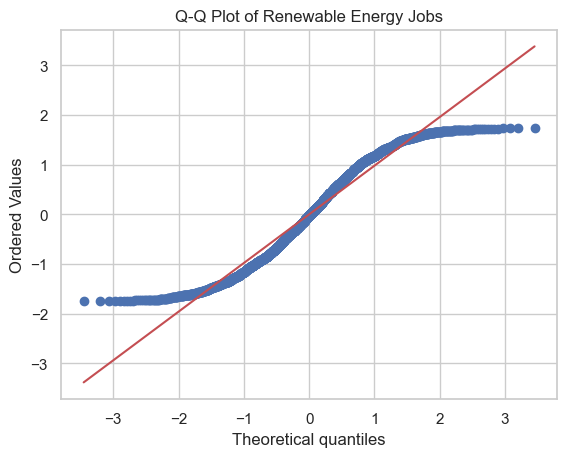

In [26]:
# Q-Q Plot
# This will help identify if the data follows a normal distribution.
stats.probplot(normalized_df['Renewable Energy Jobs'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Renewable Energy Jobs')
plt.show()

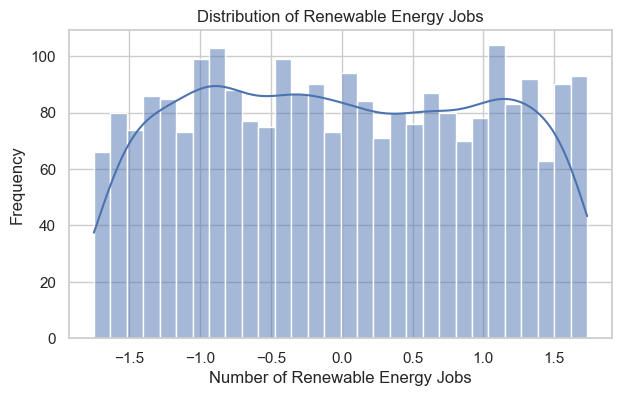

In [50]:
# KDE Plot
plt.figure(figsize=(7, 4))
sns.histplot(normalized_df['Renewable Energy Jobs'], bins=30, kde=True)
plt.title('Distribution of Renewable Energy Jobs')
plt.xlabel('Number of Renewable Energy Jobs')
plt.ylabel('Frequency')
plt.show()

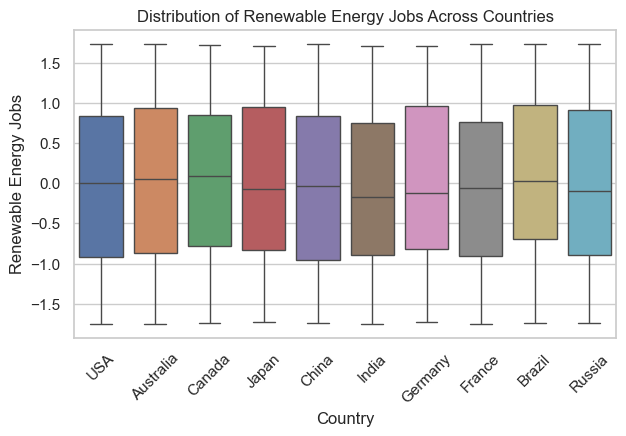

In [48]:
# Box Plot
plt.figure(figsize=(7,4))
sns.boxplot(x='Country', y='Renewable Energy Jobs', data=normalized_df, hue='Country')
plt.xticks(rotation=45)
plt.title('Distribution of Renewable Energy Jobs Across Countries')
plt.show()

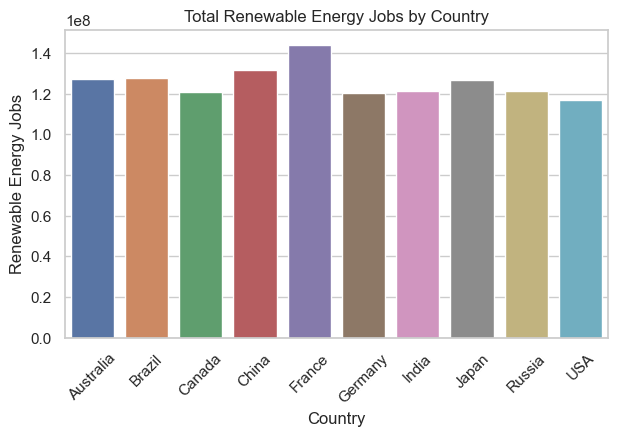

In [41]:
# Grouping by country
region_jobs = df.groupby('Country')['Renewable Energy Jobs'].sum().reset_index()

# Bar plot for Renewable Energy Jobs by Region
plt.figure(figsize=(7, 4))
sns.barplot(x='Country', y='Renewable Energy Jobs', data=region_jobs, hue='Country')
plt.title('Total Renewable Energy Jobs by Country')
plt.xticks(rotation=45)
plt.show()

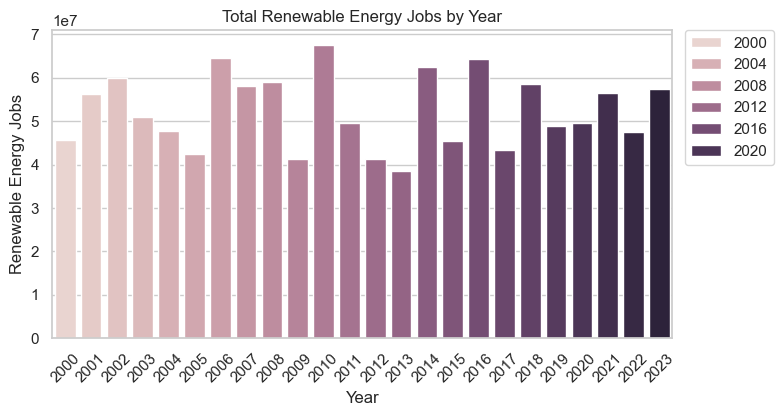

In [104]:
# Grouping by Year
jobs_by_year = df.groupby('Year')['Renewable Energy Jobs'].sum().reset_index()

# Bar plot for Renewable Energy Jobs by Region
plt.figure(figsize=(8, 4))
sns.barplot(x='Year', y='Renewable Energy Jobs', data=jobs_by_year, hue='Year')
plt.title('Total Renewable Energy Jobs by Year')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.show()

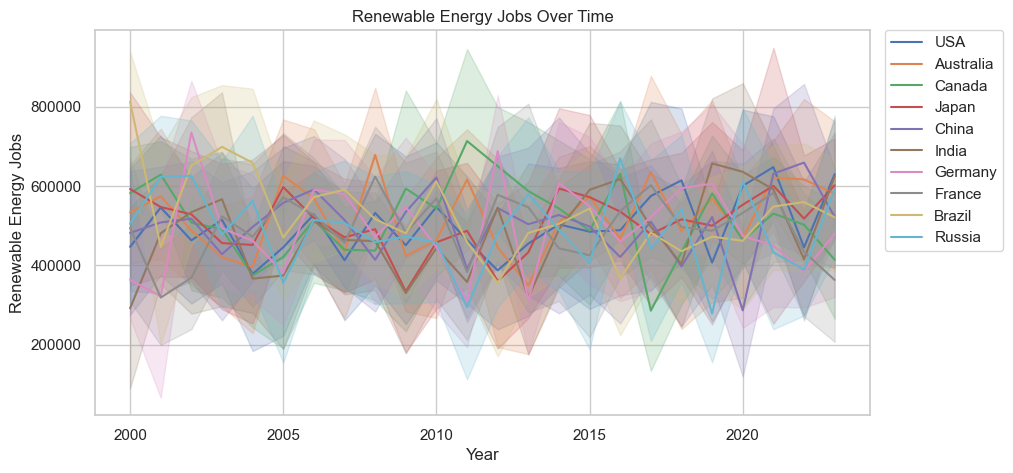

In [102]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Renewable Energy Jobs', data=df, hue='Country')
#place legend outside top right corner of plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Renewable Energy Jobs Over Time')
plt.show()

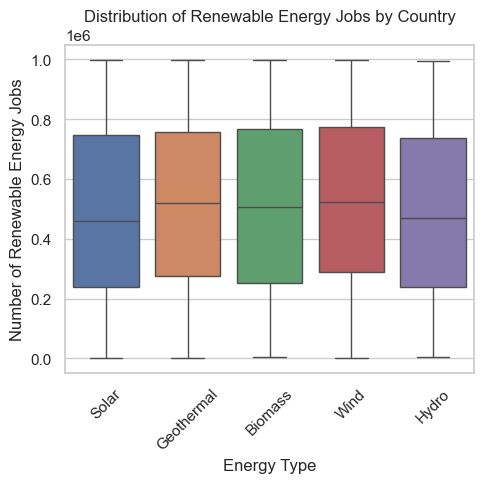

In [97]:
# Distribution by Energy Type
plt.figure(figsize=(5, 5))
sns.boxplot(x='Energy Type', y='Renewable Energy Jobs', data=df, hue='Energy Type')
plt.title('Distribution of Renewable Energy Jobs by Country')
plt.xlabel('Energy Type')
plt.ylabel('Number of Renewable Energy Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4>Correlation matrix of selected socioeconomic factors</h4>

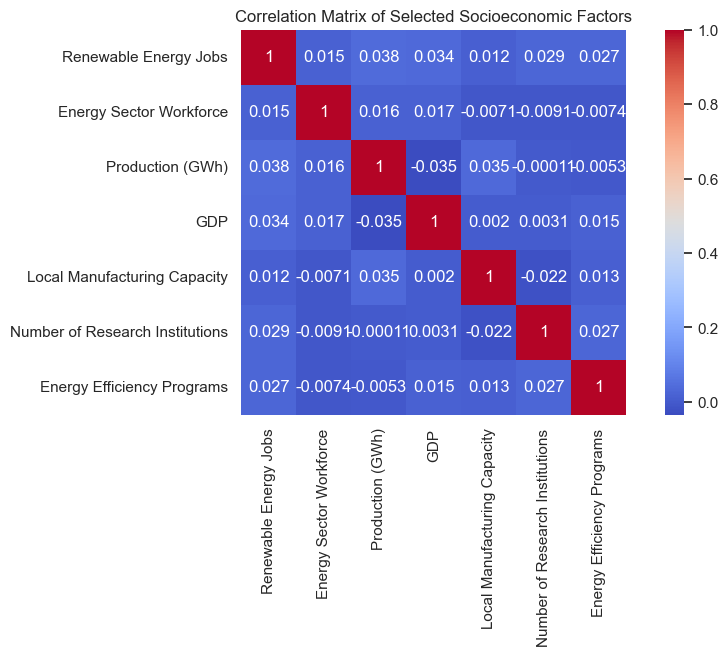

In [54]:
corr_matrix = normalized_df[['Renewable Energy Jobs','Energy Sector Workforce','Production (GWh)','GDP', 
                           'Local Manufacturing Capacity', 'Number of Research Institutions', 'Energy Efficiency Programs']].corr()
# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Selected Socioeconomic Factors')
plt.show()

In [105]:
## filtering from year 2019 to 2023
# ss = df[(df['Year'] >= 2019) & (df['Year'] <= 2023)]
df_2023 = df[df['Year'] == 2023] 

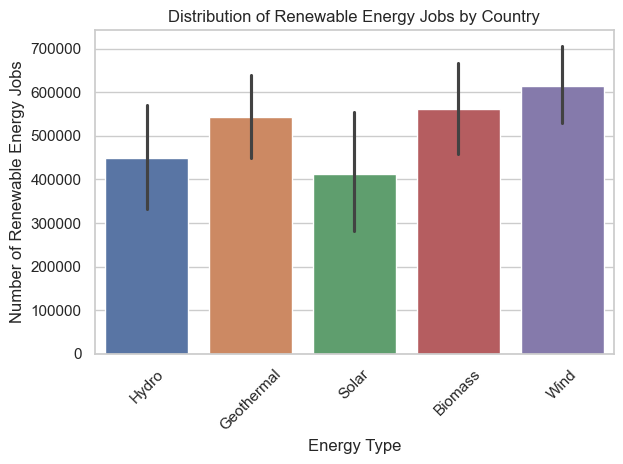

In [110]:
sns.barplot(x='Energy Type', y='Renewable Energy Jobs', data=df_2023, hue='Energy Type')
plt.title('Distribution of Renewable Energy Jobs by Country')
plt.xlabel('Energy Type')
plt.ylabel('Number of Renewable Energy Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

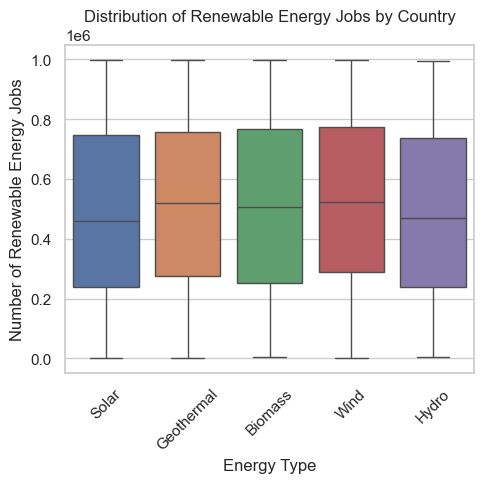

In [107]:
# Distribution by Energy Type
plt.figure(figsize=(5, 5))
